In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_excel("../materials/Studenciaki.xlsx")

# Overall info, removing unnasesery columns, renaming columns to fit what we had befor


In [48]:
print(df.columns)
print(df.shape)


Index(['Biopsja z >1 zmiany? (systematic grupa)', 'DATA URODZENIA', 'WIEK',
       'Prostatektomia w szpitalu?', 'PSA', 'PSAdensity', 'Prost vol, w MRI',
       'bx w szpitalu', 'DRE  0-prawidłowe 1-patologiczne',
       'bx (0 - biopsja pierwszy raz, 1 biopsja kolejna)',
       ...
       'Najwyższy ISUP z biopsji wszystkich', 'Wycinki + (REG)',
       'Wszystki Wycinki (REG)', 'ISUP bx SYS',
       'ilość dodatnich wycinków(SYSPL)2', 'ilość wycinków(SYSPL)',
       'ilość dodatnich wycinków(SYSPP)2', 'ilość  wycinków(SYSPP)',
       'Ilość dodatnich wycinków SYS', 'Ilość wszystkich wycinków SYS'],
      dtype='object', length=151)
(230, 151)


In [49]:
df = df.drop(columns=["DATA URODZENIA", ])

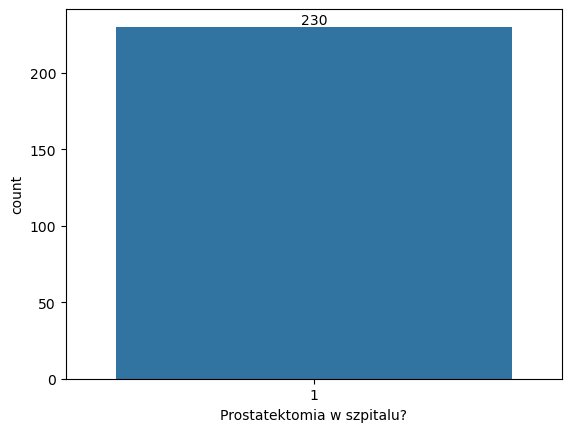

In [50]:
ax = sns.countplot(x="Prostatektomia w szpitalu?", data=df)
ax.bar_label(ax.containers[0])
plt.show()

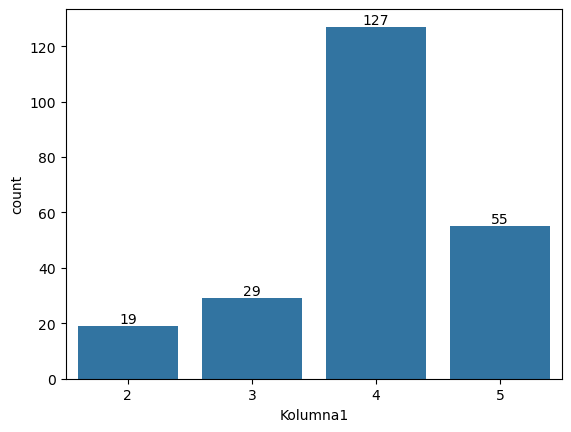

In [51]:
ax = sns.countplot(x="Kolumna1", data=df)
ax.bar_label(ax.containers[0])
plt.show()

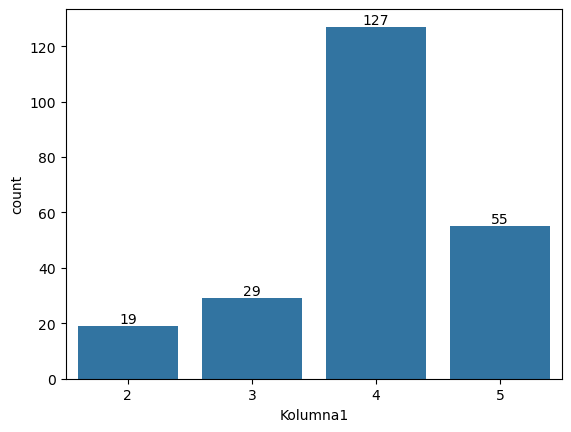

In [52]:
ax = sns.countplot(x="Kolumna1", data=df)
ax.bar_label(ax.containers[0])
plt.show()

reomve Prostektomia w szpitalu couse usuless :/

In [53]:
df.drop(columns=["Prostatektomia w szpitalu?"], inplace=True)

In [54]:
non_null_counts = df.notnull().sum()

threshold = 200

columns_with_many_missing = non_null_counts[non_null_counts < threshold]
print(len(columns_with_many_missing))
print(columns_with_many_missing)
df.shape

120
Biopsja z >1 zmiany? (systematic grupa)               0
bx (0 - biopsja pierwszy raz, 1 biopsja kolejna)     30
Strona EPE P/ L/ P+L                                  2
V (objętość) zmiany Index Lesion                    175
V zmiany 2                                           48
                                                   ... 
ilość wycinków(SYSPL)                                66
ilość dodatnich wycinków(SYSPP)2                     71
ilość  wycinków(SYSPP)                               68
Ilość dodatnich wycinków SYS                         88
Ilość wszystkich wycinków SYS                       107
Length: 120, dtype: int64


(230, 149)

In [55]:
df.drop(columns = columns_with_many_missing.index, inplace=True)


In [56]:
print(df.columns)
print(df.columns.shape)

Index(['WIEK', 'PSA', 'PSAdensity', 'Prost vol, w MRI', 'bx w szpitalu',
       'DRE  0-prawidłowe 1-patologiczne', 'EPE w MRI 0 nie 1 tak',
       'T na podstawie czy EPE+/-', 'V wszystkich zmian', 'Kolumna1',
       'Liczba zmian', 'PIRADS score - zmiana dominująca (IL)',
       'ISUP - biopsja celowana (CEL)', '% zajęcia wycinków (CEL)',
       'Najwyzszy isup', 'ISUP - RADYKALNA PROSTATEKTOMIA', 'pT-stage',
       'R(margines) 0-ujemny 1 dodatni', 'EPE 0-nie 1 -tak', 'Bx CEL PC',
       'BxCEL csPCa', ' CEL isPC', 'TGSB 0, TGPL 1, TG 2, SB 3, ??? 4',
       'PIRADS score - zmiana dominująca (IL)3', 'TOTAL CORES',
       'Najwyższy ISUP z REG/SYS', 'Bx Cel<BxSYS/REG',
       'Najwyższy ISUP z biopsji wszystkich', 'ISUP bx SYS'],
      dtype='object')
(29,)


Remove ISUP - biopsja celowana (CEL) since we care more about max isup


In [57]:
df.drop(columns = ["ISUP - biopsja celowana (CEL)"])

,WIEK,PSA,PSAdensity,"Prost vol, w MRI",bx w szpitalu,DRE 0-prawidłowe 1-patologiczne,EPE w MRI 0 nie 1 tak,T na podstawie czy EPE+/-,V wszystkich zmian,Kolumna1,...,Bx CEL PC,BxCEL csPCa,CEL isPC,"TGSB 0, TGPL 1, TG 2, SB 3, ??? 4",PIRADS score - zmiana dominująca (IL)3,TOTAL CORES,Najwyższy ISUP z REG/SYS,Bx Cel<BxSYS/REG,Najwyższy ISUP z biopsji wszystkich,ISUP bx SYS
0,67,6.40,0.213333,30.00,1,0.0,0,iT2,0.55,4,...,1.0,0.0,1.0,0,4.0,18,1,0,1,1
1,56,3.50,0.102941,34.00,1,0.0,0,iT2,0.52,4,...,1.0,0.0,1.0,0,4.0,16,1,0,1,1
2,76,8.82,0.122500,72.00,1,1.0,0,iT2,0.78,4,...,1.0,1.0,0.0,0,4.0,14,1,0,2,1
3,56,5.50,0.152778,36.00,1,1.0,0,iT2,0.34,4,...,1.0,1.0,0.0,0,4.0,14,3,1,3,3
4,68,10.80,0.225000,48.00,1,0.0,1,iT3,5.84,4,...,1.0,1.0,0.0,0,5.0,18,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,71,6.20,0.238462,26.00,0,1.0,0,iT2,0.00,5,...,1.0,1.0,0.0,4,3.0,0,0,0,3,0
226,56,5.30,0.160606,33.00,0,0.0,0,iT2,0.00,5,...,1.0,1.0,0.0,4,4.0,0,0,0,3,0
227,74,7.50,0.162443,46.17,0,1.0,0,iT2,0.00,5,...,1.0,1.0,0.0,4,4.0,0,0,0,5,0
228,68,5.60,0.073684,76.00,0,0.0,0,iT2,0.00,5,...,1.0,0.0,1.0,4,4.0,0,0,0,1,0


In [58]:
# #CZYM JEST KOLUMNA1????
# df["Kolumna1"]
# ax = sns.countplot(x = "Kolumna1", data=df)
# ax.bar_label(ax.containers[0])
# plt.show()

In [59]:
new_names = {
    "Najwyższy ISUP z biopsji" : "Bx ISUP Grade",
    "DRE 0-prawidłowe 1-patologiczne" : "DRE",
    "bx w szpitalu" : "BX",
    "EPE w MRI 0 nie 1 tak" : "MRI EPE",
    "T na podstawie czy EPE+/-" : "T EPE", # tez nie wiem co to 
    "V wszystkich zmian" : "V", #tu nie wiem co to
    "Najwyższy isup" : "Bx Isup Grade",
    "ISUP - RADYKALNA PROSTATEKTOMIA" : "RP ISUP Grade"   
}

In [60]:
df.rename(columns = new_names, inplace = True)

# Check for null values

In [61]:
df.isnull().sum()

WIEK                                       0
PSA                                        0
PSAdensity                                 1
Prost vol, w MRI                           1
BX                                         0
DRE  0-prawidłowe 1-patologiczne           2
MRI EPE                                    0
T EPE                                      0
V                                          0
Kolumna1                                   0
Liczba zmian                               0
PIRADS score - zmiana dominująca (IL)      5
ISUP - biopsja celowana (CEL)              5
% zajęcia wycinków (CEL)                  30
Najwyzszy isup                             0
RP ISUP Grade                              0
pT-stage                                   0
R(margines) 0-ujemny 1 dodatni             0
EPE 0-nie 1 -tak                           0
Bx CEL PC                                  5
BxCEL csPCa                                5
 CEL isPC                                  5
TGSB 0, TG

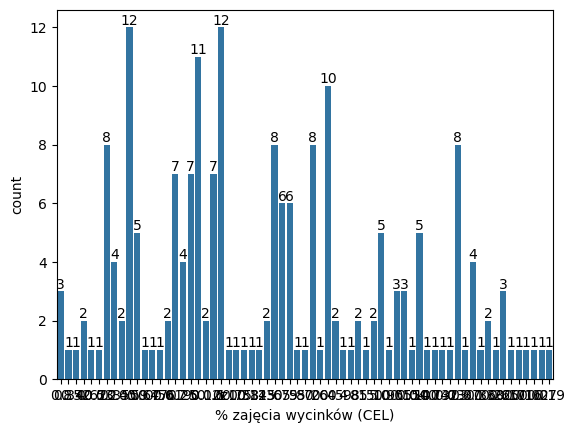

In [62]:
ax = sns.countplot(x="% zajęcia wycinków (CEL)", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [63]:
df[df["PIRADS score - zmiana dominująca (IL)"].isnull()]

,WIEK,PSA,PSAdensity,"Prost vol, w MRI",BX,DRE 0-prawidłowe 1-patologiczne,MRI EPE,T EPE,V,Kolumna1,...,Bx CEL PC,BxCEL csPCa,CEL isPC,"TGSB 0, TGPL 1, TG 2, SB 3, ??? 4",PIRADS score - zmiana dominująca (IL)3,TOTAL CORES,Najwyższy ISUP z REG/SYS,Bx Cel<BxSYS/REG,Najwyższy ISUP z biopsji wszystkich,ISUP bx SYS
171,63,5.90,0.236000,25.0,0,1.0,1,iT3,0.00,5,...,1.0,1.0,0.0,4,NaN,0,0,0,3,0
179,63,11.00,0.333333,33.0,0,1.0,0,iT2,1.05,4,...,1.0,1.0,0.0,4,NaN,0,0,0,3,0
209,64,1.05,0.028378,37.0,0,0.0,0,iT2,3.42,2,...,1.0,1.0,0.0,4,NaN,0,0,0,2,0
220,73,8.00,0.172786,46.3,0,0.0,0,iT2,1.17,3,...,1.0,1.0,0.0,4,NaN,0,0,0,3,0
222,70,9.70,0.485000,20.0,0,0.0,0,iT2,1.13,3,...,1.0,0.0,1.0,4,NaN,0,0,0,1,0


In [102]:
#print(df["% zajęcia wycinków (CEL)"])
is_true = df["% zajęcia wycinków (CEL)"] == "0z10"
#print(df[is_true])
df.loc[30, "% zajęcia wycinków (CEL)"] = "0.0"
df["% zajęcia wycinków (CEL)"] = df["% zajęcia wycinków (CEL)"].astype(float)
max = df["% zajęcia wycinków (CEL)"].max()
print(f"max: {max}")
min = df["% zajęcia wycinków (CEL)"].min()
print(f"min: {min}")
mask = df["% zajęcia wycinków (CEL)"].isnull()
mask.sum()
df.loc[mask, "% zajęcia wycinków (CEL)"] = np.random.randint(int(min), int(max)+1, size=mask.sum())
print(df["% zajęcia wycinków (CEL)"].isnull().sum())

max: 100.0
min: 0.0
0


/tmp/ipykernel_129266/187544689.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[30, "% zajęcia wycinków (CEL)"] = "0.0"


### PSAdensity remove null

In [108]:
df.isnull().sum()
k = df["PSAdensity"].isnull()
df.loc[k, "PSAdensity"] = df["PSAdensity"].mean()
print(df["PSAdensity"].isnull().sum())

0


# Check outliers


# Remove Duplicates

In [113]:
# :) 
print(df.duplicated().sum())

0


# SAVE DATASET

In [ ]:
df.to_csv('.././materials/processed_df_studenciaki.csv', index=False)